# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("alpaca.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
requests.get(btc_url)
response_data_btc = requests.get(btc_url)
json_btc = response_data_btc.json()
data_btc = json_btc["data"]['1']['quotes']['USD']['price']
# # Fetch current ETH price
requests.get(eth_url)
response_data_eth = requests.get(eth_url)
json_eth = response_data_eth.json()
data_eth = json_eth["data"]['1027']['quotes']['USD']['price']
# # Compute current value of my crpto
my_btc_value = my_btc * data_btc
my_eth_value = my_eth * data_eth

# # Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $69211.20
The current value of your 5.3 ETH is $15630.92


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
load_dotenv("alpaca.env")
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
end_date_data = pd.to_datetime("today")
start_date_data = pd.to_datetime("today")

end_date = pd.Timestamp(end_date_data, tz="America/New_York").isoformat()
start_date = pd.Timestamp(start_date_data, tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(tickers, timeframe, limit=1).df

# # Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open     high     low  close   volume    open   
time                                                                         
2021-04-30 00:00:00-04:00  114.41  114.515  114.33  114.5  5160765  417.63   

                                                            
                             high     low  close    volume  
time                                                        
2021-04-30 00:00:00-04:00  418.54  416.34  417.3  73129109

In [9]:
# Pick AGG and SPY close prices
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]


agg_close_price = df_portfolio["AGG"]["close"].values[0]
spy_close_price = df_portfolio["SPY"]["close"].values[0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $114.5
Current SPY closing price: $417.3


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20865.00
The current value of your 200 AGG shares is $22900.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame()

df_savings['amount'] = [round(my_btc_value+my_eth_value,2),round(my_spy_value+my_agg_value,2)]
df_savings.index = ['crypto','shares']

# Display savings DataFrame
display(df_savings)

,amount
crypto,84842.12
shares,43765.00


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

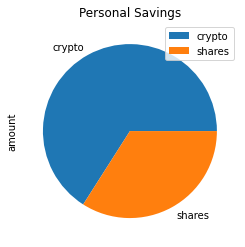

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount",title ="Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3


# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings['amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations for having enough money in this fund: ${total_savings}")
elif total_savings == emergency_fund:
    print(f"Congratulations on reaching your financial goal: ${total_savings}")
else:
    print(f"You are ${emergency_fund-total_savings} from reaching your goal")

Congratulations for having enough money in this fund: $128607.12


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
ticker = ["SPY","AGG"]
timeframe = "1D"
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660  2071970   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207  
2016-08-24 00:00:00-04:00  218.82  218.91  217.36  217.88  50310103

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

num_sims = 500
MC_Retiremnt = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30)


In [17]:
# Printing the simulation input data
MC_Retiremnt

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Retiremnt.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996654,1.008370,0.995720,0.998368,0.991142,1.003150,0.988681,1.002649,0.998565,0.990469,...,0.999494,1.000340,0.996195,1.003334,1.003021,0.994251,0.996992,0.998218,0.991732,0.989727
2,1.000297,1.013143,1.001867,1.004583,0.993682,1.003550,0.994485,1.001329,0.998633,0.993493,...,1.002567,1.004536,1.001199,1.009298,1.002978,0.986017,0.989193,1.001708,0.996852,0.985893
3,0.999833,1.002659,0.997535,1.001859,0.997314,0.998054,0.993899,0.999763,0.989645,1.003218,...,1.008713,1.005154,0.993176,1.010516,1.006025,0.986316,0.987398,1.006959,0.999339,0.982977
4,0.998031,0.994834,0.989140,0.994379,1.003633,0.992668,0.986591,1.002227,0.986764,1.005397,...,1.000516,1.012693,0.996725,1.022237,0.999751,0.989582,0.979911,1.015308,0.993954,0.984611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.387436,4.417827,3.608484,4.449397,7.275209,11.099227,2.078754,5.789680,3.864254,11.596445,...,2.567584,6.838846,3.550189,5.931208,8.087390,3.234746,10.864996,11.247236,16.553045,4.465435
7557,2.376069,4.439132,3.617955,4.486827,7.204355,11.147907,2.075269,5.793620,3.856863,11.483577,...,2.567499,6.825745,3.561625,6.024351,8.115098,3.240546,10.856011,11.299802,16.458164,4.452274
7558,2.377337,4.474080,3.574346,4.491738,7.114415,11.174177,2.084460,5.779034,3.874463,11.406276,...,2.586145,6.790793,3.557408,5.975756,8.094854,3.216820,10.800848,11.408561,16.535930,4.431532
7559,2.372629,4.508916,3.526017,4.508387,6.993709,11.202199,2.080240,5.850351,3.863435,11.310675,...,2.591257,6.737027,3.507764,6.022431,8.037086,3.225741,10.733827,11.484982,16.757660,4.459574


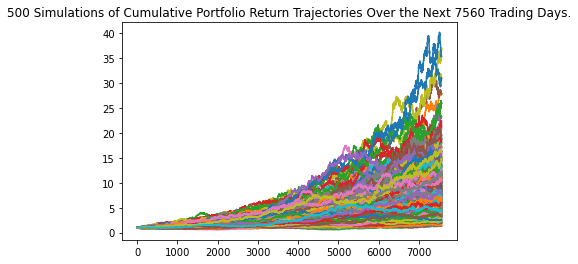

In [19]:
# Plot simulation outcomes
line_plot = MC_Retiremnt.plot_simulation()

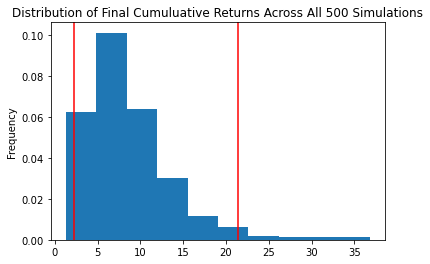

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Retiremnt.plot_distribution()
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_Retiremnt.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              8.596112
std               5.043897
min               1.281360
25%               5.273215
50%               7.483121
75%              10.971193
max              36.832680
95% CI Lower      2.245642
95% CI Upper     21.399839
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $44912.85 and $427996.78


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $67369.27 and $641995.17


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500
MC_Retiremnt_5 = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*5)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Retiremnt_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992789,0.993789,0.990683,0.996763,0.996076,1.011766,1.003116,0.998202,1.005278,0.997990,...,0.993316,1.004452,0.997608,1.004537,0.988335,1.001725,0.986003,1.005659,0.997598,0.997023
2,0.984687,0.991572,0.999662,0.992827,0.995803,1.015417,1.009014,1.003145,1.002254,1.008081,...,0.993135,1.002595,1.008673,1.004178,0.998316,1.006512,0.974798,1.009846,1.001144,0.998011
3,0.983526,0.984746,1.000465,0.996026,0.987599,1.014176,1.008177,1.005225,1.009337,1.001184,...,0.985837,1.009525,1.011813,1.013867,1.006429,1.008955,0.969289,1.002105,1.002760,1.008462
4,0.976262,0.978781,1.008806,0.998351,0.994901,1.020290,1.013745,1.006549,1.016578,1.011349,...,0.984625,1.008099,1.015552,1.006733,1.002729,1.008411,0.971307,1.005358,1.011412,1.005579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.157268,1.466167,2.149238,1.380335,1.534143,1.346603,2.466384,1.302215,1.346871,1.016170,...,1.046334,1.068959,1.900619,1.877158,1.035323,0.987902,1.385021,1.478996,1.326178,1.291703
1257,1.142353,1.459618,2.147477,1.378831,1.533436,1.353221,2.456895,1.306542,1.349484,1.010066,...,1.054416,1.063937,1.889768,1.873226,1.041557,0.987115,1.387415,1.457488,1.315243,1.290094
1258,1.152298,1.454430,2.139388,1.380515,1.538951,1.349543,2.475380,1.309764,1.360244,1.012489,...,1.055772,1.057362,1.873088,1.873192,1.049294,0.984858,1.387151,1.446278,1.320741,1.278601
1259,1.150963,1.449240,2.116686,1.378927,1.526886,1.373659,2.499547,1.308205,1.355707,1.018875,...,1.045681,1.052367,1.873100,1.858001,1.041390,0.985296,1.396359,1.439593,1.329734,1.285882


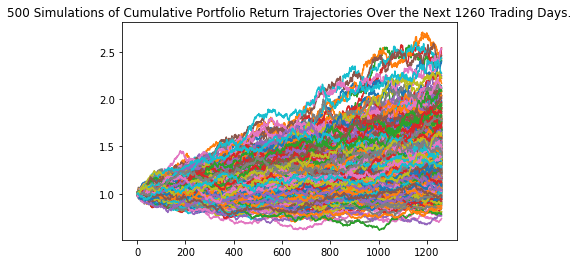

In [26]:
# Plot simulation outcomes
line_plot = MC_Retiremnt_5.plot_simulation()

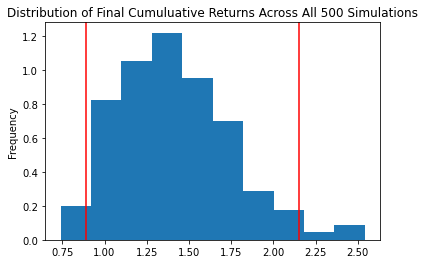

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Retiremnt_5.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5 = MC_Retiremnt_5.summarize_cumulative_return()

# Print summary statistics
print(tbl_5)

count           500.000000
mean              1.415901
std               0.331034
min               0.739324
25%               1.173286
50%               1.388199
75%               1.618237
max               2.541196
95% CI Lower      0.892116
95% CI Upper      2.149728
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5[8]*initial_investment,2)
ci_upper_five = round(tbl_5[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17842.32 and $42994.56


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500
MC_Retiremnt_10 = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*10)

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Retiremnt_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

In [ ]:
# Plot simulation outcomes
line_plot = MC_Retiremnt_10.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Retiremnt_10.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10 = MC_Retiremnt_10.summarize_cumulative_return()

# Print summary statistics
print(tbl_10)

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10[8]*initial_investment,2)
ci_upper_ten = round(tbl_10[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")